<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<img src="logo.png">

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport

ModuleNotFoundError: No module named 'calmap'

Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Task 1: Initial Data Exploration

In [3]:
df = pd.read_csv('supermarket_sales.csv')

In [33]:
df['Date'] = pd.to_datetime(df['Date'])

In [35]:
#it is common convention to set the Date as index
df.set_index('Date', inplace=True)

In [40]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

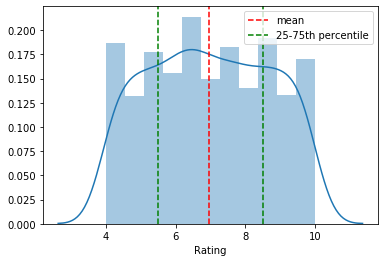

In [17]:
sns.distplot(df['Rating']) #plot graph
#mean of rating of the dataframe, red line, dotted, labelled
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Rating'], 25), ls='--', c='green', label='25-75th percentile')
plt.axvline(x=np.percentile(df['Rating'], 75), ls='--', c='green')
plt.legend()
#relatively uniform and no skew on left or right

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bd8567650>,
      dtype=object)

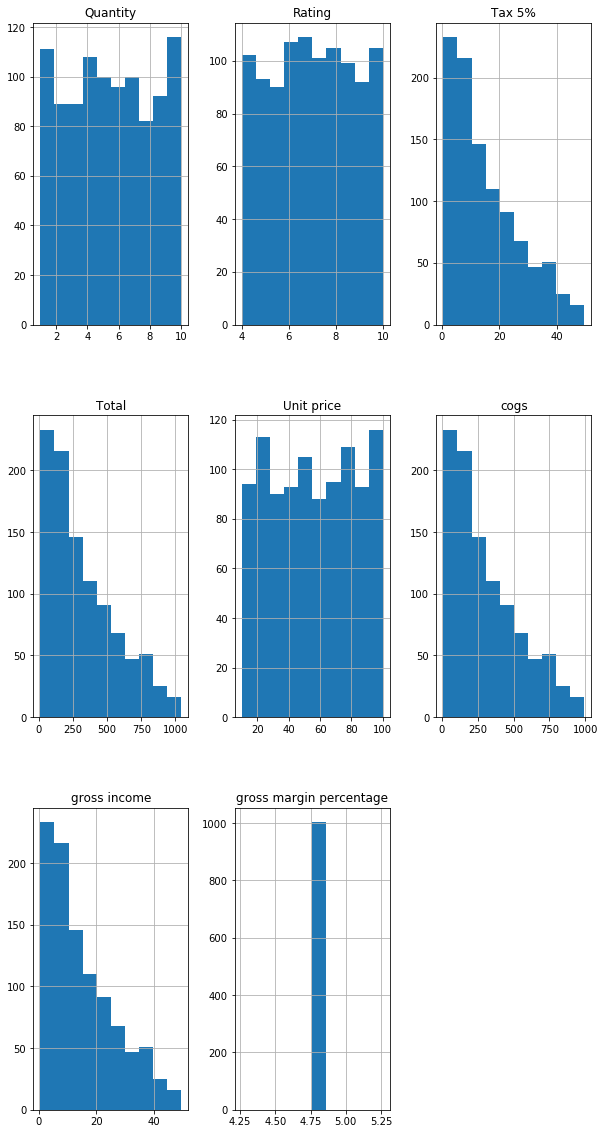

In [22]:
#df.histogram, plots all of the graphs
df.hist(figsize=(10,20))

**Question 2:** Do aggregate sales numbers differ by much between branches?

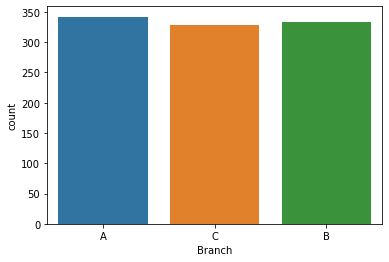

In [23]:
#according to the graph, nope
sns.countplot(df['Branch'])

In [24]:
#self explanatory
df['Branch'].value_counts()

A    342
B    333
C    328
Name: Branch, dtype: int64

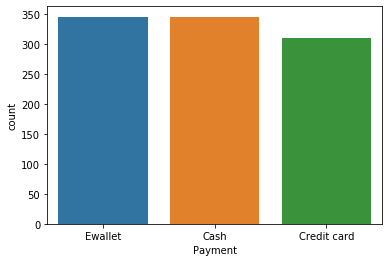

In [25]:
sns.countplot(df['Payment'])

### Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

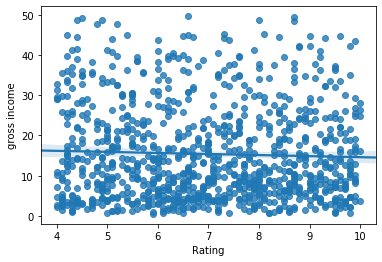

In [29]:
sns.regplot(df['Rating'], df['gross income'])
#apparently 0 relationship, since the regression line is literally flat

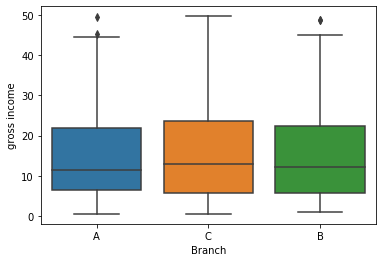

In [30]:
sns.boxplot(x=df['Branch'], y=df['gross income'])

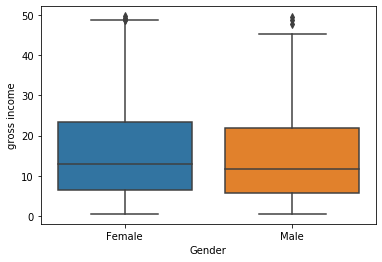

In [31]:
#pretty similar, men and women
sns.boxplot(x=df['Gender'], y=df['gross income'])

**Question 4:** Is there a noticeable time trend in gross income?

In [43]:
df.groupby(df.index).mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-01,54.995833,6.454545,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,61.636667,4.583333,14.034458,294.723625,280.689167,4.761905,14.034458,7.433333
2019-01-06,59.573333,5.777778,19.122778,401.578333,382.455556,4.761905,19.122778,8.177778
2019-01-07,56.898889,5.888889,14.996000,314.916000,299.920000,4.761905,14.996000,7.633333
2019-01-08,48.792778,5.000000,14.004583,294.096250,280.091667,4.761905,14.004583,6.750000
2019-01-09,47.282500,7.250000,17.984188,377.667938,359.683750,4.761905,17.984188,6.137500


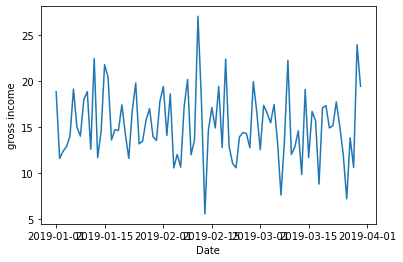

In [44]:
#a group by is done since there're duplicate dates in our dataset
#basically -> x is mean of our dataframe's index(date), and y, of our gross income 
sns.lineplot(x=df.groupby(df.index).mean().index, 
             y=df.groupby(df.index).mean()['gross income'])

### Task 4: Dealing With Duplicate Rows and Missing Values

In [46]:
#rows duplicated
df.duplicated().sum()

3

In [47]:
#returns those that're duplicated
df[df.duplicated()==True]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-02-18,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,13:28,Cash,618.38,4.761905,30.919,6.6
2019-03-10,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,20:46,Ewallet,116.06,4.761905,5.803,8.8
2019-01-26,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,15:17,Cash,609.56,4.761905,30.478,5.5


In [48]:
#self explanatory
df.drop_duplicates(inplace=True)

In [50]:
df.duplicated().sum()

0

In [51]:
#check if any column has missing values
df.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [52]:
#fills the na values with the mean of the column, inplace=True means
#it actually overwrite the dataset, if not specified only change is shown
#but not overwritten
df.fillna(df.mean(), inplace=True)

In [53]:
#notice here only the quantity has become 0, since customer types and product line
#cuz they obv have no mean
df.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  0
Quantity                    0
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [57]:
#replaces em with the mode(most common one)
df.fillna(df.mode().iloc[0], inplace=True)

In [58]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

### Task 5: Correlation Analysis

In [60]:
#coorrelation between gross income and rating
np.corrcoef(df['gross income'], df['Rating'])

array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

In [61]:
#correlation between everything
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000e+00,1.478639e-02,6.290338e-01,6.290338e-01,6.290338e-01,-4.482629e-16,6.290338e-01,-6.601308e-03
Quantity,1.478639e-02,1.000000e+00,7.040671e-01,7.040671e-01,7.040671e-01,-8.293717e-17,7.040671e-01,-2.122532e-02
Tax 5%,6.290338e-01,7.040671e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02
Total,6.290338e-01,7.040671e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.408632e-16,1.000000e+00,-3.644170e-02
cogs,6.290338e-01,7.040671e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.439279e-15,1.000000e+00,-3.644170e-02
gross margin percentage,-4.482629e-16,-8.293717e-17,2.461896e-16,2.408632e-16,1.439279e-15,1.000000e+00,2.461896e-16,2.042714e-15
gross income,6.290338e-01,7.040671e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02
Rating,-6.601308e-03,-2.122532e-02,-3.644170e-02,-3.644170e-02,-3.644170e-02,2.042714e-15,-3.644170e-02,1.000000e+00


### Helpful Links

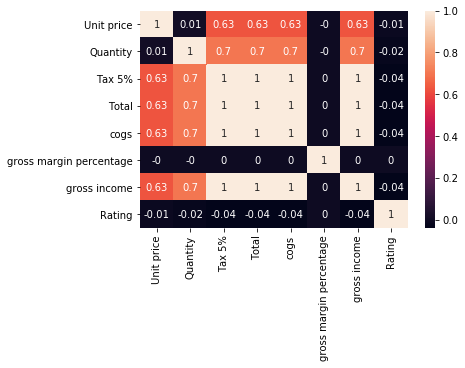

In [64]:
sns.heatmap(np.round(df.corr(), 2), annot=True)

1. More visualizations: https://www.data-to-viz.com/
2. Seaborn gallery: https://seaborn.pydata.org/examples/index.html
3. Pandas profiling documentation: https://pypi.org/project/pandas-profiling/